In [2]:
import os
import statistics
from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import medfilt

In [56]:
proj_dir = "/master/nplatt/sch_hae_scan"
results_dir = f"{proj_dir}/results"

In [28]:
Path(f"{results_dir}/pub_figs").mkdir(parents=True, exist_ok=True)
os.chdir(f"{results_dir}/pub_figs")

In [120]:
info_df["sample_

,admera_id,barcode_label_ID,library_id,sample_name,sra_accession,presumed_species,country,locale,host,phenotype,project,data_type,lat,lon
0,19047FL-14-02-03,MCF03050E0612,na,sha_angola_cota_57,SRR11907442,s_sp,angola,na,snail,unk,scan_africa,genome,-9.26186,16.13693
1,19047FL-14-02-04,MCF03050E0613,na,sha_angola_cota_58,SRR11907441,s_sp,angola,na,snail,unk,scan_africa,genome,-9.26186,16.13693
2,19047FL-14-02-05,MCF03050E0614,na,sha_angola_cota_59,SRR11907440,s_sp,angola,na,snail,unk,scan_africa,genome,-9.26186,16.13693
3,19047FL-14-02-06,MCF03050E0615,na,sha_angola_icau_60,SRR11907439,s_haematobium,angola,na,human,haematobium,scan_africa,genome,-8.64510,13.79642
4,19047FL-14-02-07,MCF03050E0615,na,sha_angola_icau_61,SRR11907438,s_haematobium,angola,na,human,haematobium,scan_africa,genome,-8.64510,13.79642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,na,na,na,sh_egypt_SRR433862,SRR433862,s_haematobium,egypt,na,na,haematobium,Rey_2019,genome,NaN,NaN
445,na,na,na,sh_gambia_SRR13579872,SRR13579872,s_haematobium,gambia,na,na,haematobium,Rey_2019,genome,NaN,NaN
446,na,na,na,sh_cote_d_ivoire_SRR13579866,SRR13579866,s_haematobium,cote_d_ivoire,na,na,haematobium,Rey_2019,genome,NaN,NaN
447,na,na,na,sh_madagascar_SRR13579871,SRR13579871,s_haematobium,madagascar,na,na,haematobium,Rey_2019,genome,NaN,NaN


In [137]:
df

,kmeans_label,country,count
0,sb,cote_d_ivoire,7
1,sb,ethiopia,1
2,sb,kenya,1
3,sb,nigeria,9
4,sb,senegal,1
5,sb,tanzania,1
6,sb,uganda,1
7,sh_nw,cameroon,1
8,sh_nw,cote_d_ivoire,21
9,sh_nw,egypt,2


In [128]:
df["count"].sum()

161

# Admixture

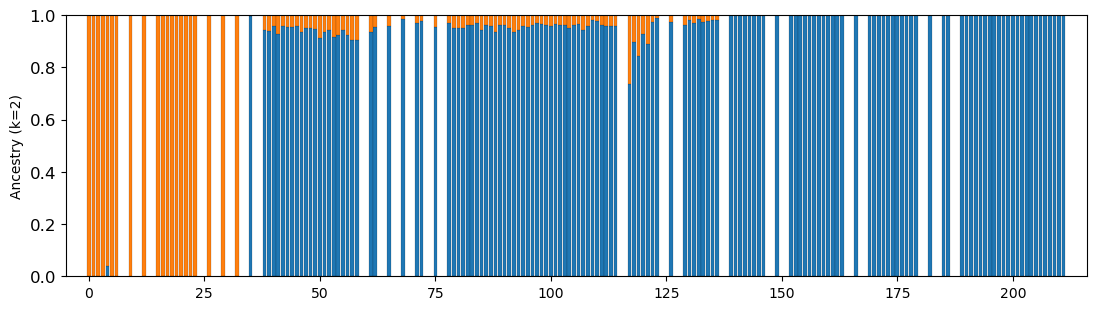

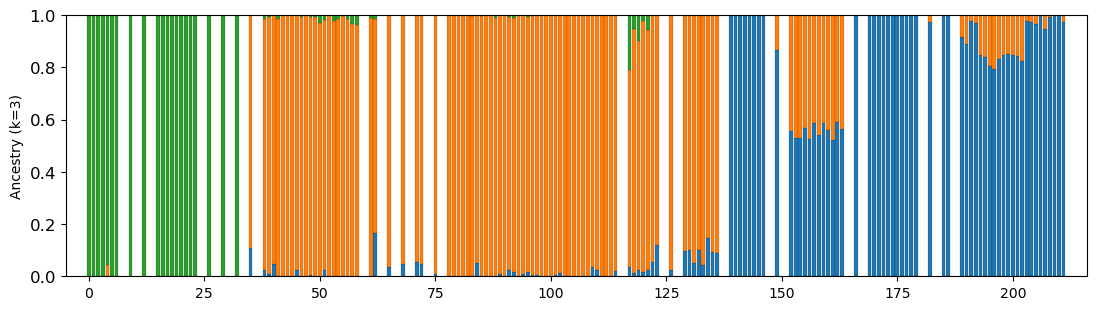

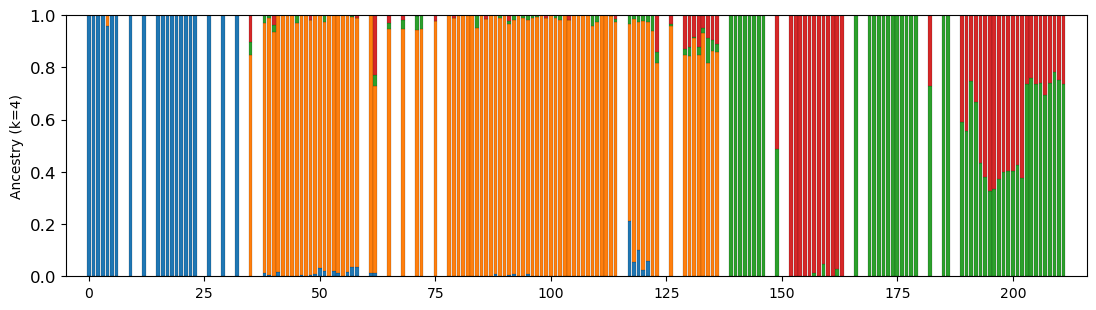

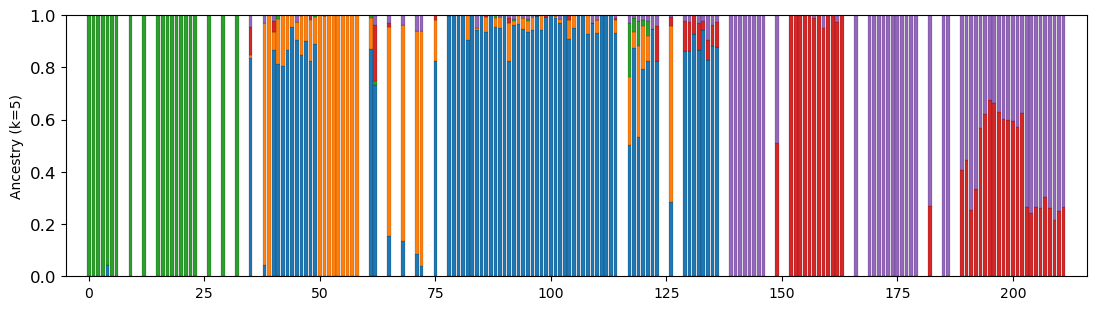

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Conversion factor from cm to inches
cm = 1 / 2.54 

# Project and results directories
proj_dir = "/master/nplatt/sch_hae_scan"
results_dir = f"{proj_dir}/results"

# Read in samples
with open(f"{results_dir}/admixture/samples.list", 'r') as f:
    samples = f.read().splitlines()

# Set range of ks to be investigated
ks = list(range(2, 6))

# Loop over each k value
for k in ks:
    plt.figure(figsize=(28 * cm, 8 * cm))

    # Read the admixture data for the given k
    adm_df = pd.read_csv(f"{results_dir}/admixture/adm.{k}.Q", sep=" ", header=None)
    adm_df["sample_name"] = samples

    x = list(range(len(adm_df)))

    # Read the sample information data
    info_df = pd.read_csv(f"{proj_dir}/data/seq_and_sample_docs/all_sh_sb_sample_data.csv", sep=",")
    
    # Merge the admixture data with sample information
    adm_df = adm_df.merge(info_df, how='left', on='sample_name')

    # Read and merge PCA kmeans groups
    pca_df = pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")
    adm_df = adm_df.merge(pca_df[["sample_name", "kmeans_label"]], how='left', on='sample_name')

    # Sort values by kmeans label and country
    adm_df = adm_df.sort_values(by=["kmeans_label", "country"]).reset_index(drop=True)

     # Create new x-values with gaps
    gap = 1  # Gap size


    df = adm_df.groupby(['kmeans_label', 'country']).size().reset_index(name='count')

    xs = []
    
    # Generate indices with gaps
    current_index = 0
    for count in df['count']:
        for i in range(count):
            xs.append(current_index)
            current_index += 1
        current_index += 2  # Adding a gap of 5 between groups
    #xs.append(current_index)

    # Plot the admixture components
    bottom = [0] * len(adm_df)
    for p_comp in range(k):
        plt.bar(xs, adm_df[p_comp], bottom=bottom, edgecolor="black", linewidth=0.1)
        bottom = [i + j for i, j in zip(bottom, adm_df[p_comp])]

    
    plt.ylabel(f"Ancestry (k={k})", fontsize=10)
    plt.tight_layout()
    plt.xlim(-5, xs[-1] + 5)
    plt.ylim(0, 1)
    # plt.xticks(xticks, xlabels, rotation=90)
    plt.yticks(fontsize=12)
    
    # Save the figures
    plt.savefig(f"k{k}.tmp.svg")
    plt.savefig(f"k{k}.tmp.png")
    plt.show()
    plt.close()
